<a href="https://colab.research.google.com/github/alptuggurler/CPE312/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data_science

In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
titanic_train = pd.read_csv("/content/drive/MyDrive/csv/train.csv")
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_train.shape

(891, 12)

In [ ]:
titanic_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
categorical = titanic_train.dtypes[titanic_train.dtypes == "object"].index
print(categorical)

titanic_train[categorical].describe()

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
titanic_train["Ticket"][0:20] # ilk 20 bileti gösteriri

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [ ]:
titanic_train["Ticket"].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [ ]:
del titanic_train["Ticket"] # bileti siler

In [ ]:
new_Pclass = pd.Categorical(titanic_train["Pclass"], ordered = True)

new_Pclass = new_Pclass.rename_categories(["Class1","Class2","Class3"])  
new_Pclass.describe()

,counts,freqs
categories,,
Class1,216,0.242424
Class2,184,0.206510
Class3,491,0.551066


In [ ]:
titanic_train["Pclass"] = new_Pclass


In [ ]:
titanic_train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
char_cabin = titanic_train["Cabin"].astype(str) # stringe çevirme

new_Cabin = np.array([cabin[0] for cabin in char_cabin]) # ilk harflerini alır

new_Cabin = pd.Categorical(new_Cabin)

new_Cabin .describe()

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


In [ ]:
titanic_train["Cabin"] = new_Cabin

In [ ]:
dummy_vector = pd.Series([1,None,3,None,7,8])

dummy_vector.isnull()

0    False
1     True
2    False
3     True
4    False
5    False
dtype: bool

In [ ]:
titanic_train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
missing = np.where(titanic_train["Age"].isnull() == True)
missing

(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
         48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
        126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
        196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
        270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
        334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
        409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
        459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
        511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
        564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
        613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
        692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
        773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
        839, 846, 849, 859, 863, 868, 878, 888]),)

In [ ]:
len(missing[0])

177

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

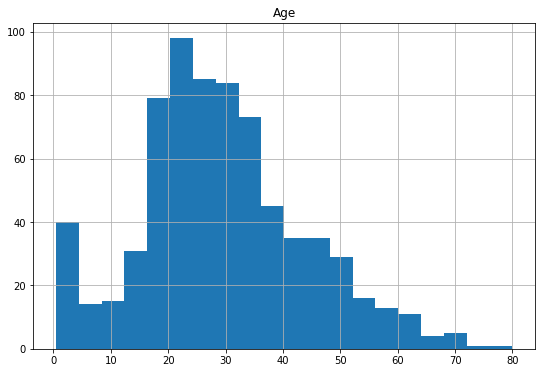

In [ ]:
titanic_train.hist(column='Age',    
                   figsize=(9,6),   # Plot boyutu
                   bins=20)         # histogram bins sayısı

In [ ]:
#ortalamanın düzgün çıkması için sıfır değerleri en yoğun aralıktan bir değer atamamız gerekior
new_age_var = np.where(titanic_train["Age"].isnull(), 
                       26,                       
                       titanic_train["Age"])     

titanic_train["Age"] = new_age_var 

titanic_train["Age"].describe()

count    891.000000
mean      28.964276
std       13.085607
min        0.420000
25%       22.000000
50%       26.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

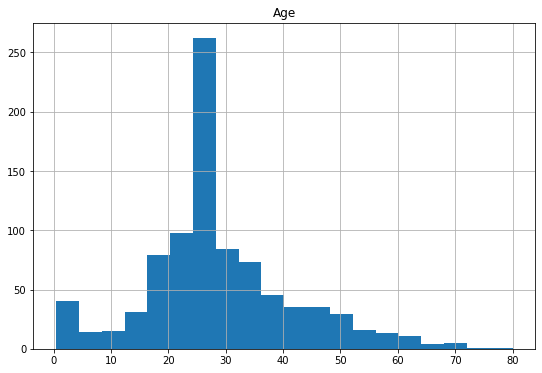

In [ ]:
titanic_train.hist(column='Age',    
                   figsize=(9,6),   # Plot boyutu
                   bins=20)         # histogram bins sayısı

# Seaborn


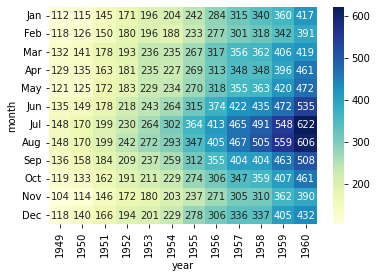

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data = sns.load_dataset("flights")

data = data.pivot("month","year","passengers")


# heatmap

sns.heatmap(data=data , annot=True ,fmt="d" , cmap="YlGnBu")

plt.show()


In [ ]:
data.info

<bound method DataFrame.info of year   1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
month                                                                        
Jan     112   115   145   171   196   204   242   284   315   340   360   417
Feb     118   126   150   180   196   188   233   277   301   318   342   391
Mar     132   141   178   193   236   235   267   317   356   362   406   419
Apr     129   135   163   181   235   227   269   313   348   348   396   461
May     121   125   172   183   229   234   270   318   355   363   420   472
Jun     135   149   178   218   243   264   315   374   422   435   472   535
Jul     148   170   199   230   264   302   364   413   465   491   548   622
Aug     148   170   199   242   272   293   347   405   467   505   559   606
Sep     136   158   184   209   237   259   312   355   404   404   463   508
Oct     119   133   162   191   211   229   274   306   347   359   407   461
Nov     104   114   146   172   

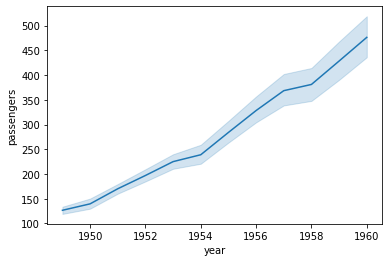

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data = sns.load_dataset("flights")


sns.lineplot(data=data, x="year",y="passengers")
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


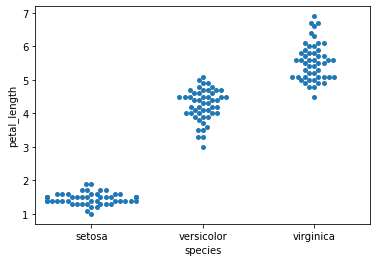

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data = sns.load_dataset("iris")

sns.swarmplot(x="species" ,y ="petal_length" , data= data)
plt.show()


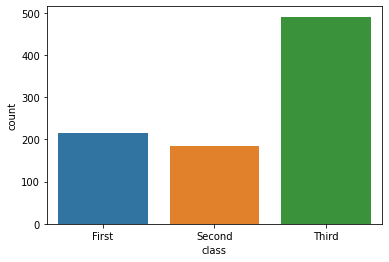

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data = sns.load_dataset("titanic")

#bar plot
sns.countplot(data=data , x="class")


plt.show()

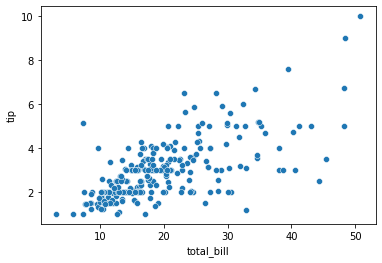

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data= sns.load_dataset("tips")

#scatter plot

sns.scatterplot(data=data, x = "total_bill", y = "tip")
plt.show()


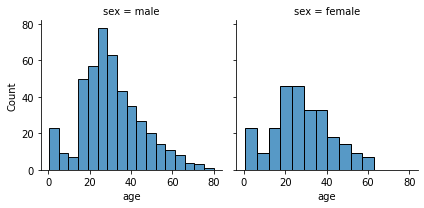

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data= sns.load_dataset("titanic")

#facet grid

g = sns.FacetGrid(data,col= "sex")

g.map(sns.histplot, "age")
plt.show()


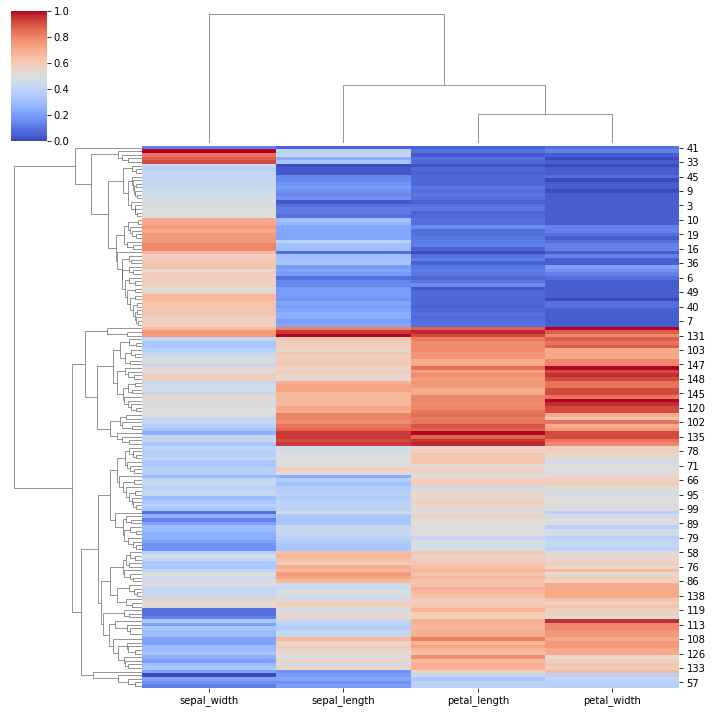

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

iris= sns.load_dataset("iris")

g = sns.clustermap(iris.drop("species",axis=1),cmap="coolwarm",standard_scale=1)

plt.show()




# #Plot

Bar Plot

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly.graph_objs as go

In [46]:
timesData = pd.read_csv("/content/drive/MyDrive/1csv/timesData.csv")

In [47]:
timesData.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


**trace** kısmı oluşturulurken

*   **x** = x eksenine koyulacak sütun yazılır.
*   **y** = x eksenine koyulacak sütun yazılır.
*   **mode** = kullanılacak plotun türüdür.
*   **name** = trace'in adıdır, kenarda hangi renkte hangi verinin kullanıldığının bilgisini verir.
*   **marker** = dictionarylerle birlikte kullanılır, renk ve saydamlık belirlenir.
*   **text** = plotun üzerinde gezinirken değerin ait olduğu bilgidir.

**data** = traceler eklendiği listedir.

**layout** = dictionarydir ve içerisinde şunları barındırır;
*   **title** = başlık bilgisi
*   **x axis** = bir dictionarydir ve içerisinde şunları barındırır;
  *   **title** = x ekseninin adı
  *   **ticklen** = x eksenindeki başlığın kalınlığı
  *   **zeroline** = False olduğunda sıfırdan geçen çizgiler devre dışı bırakılır.

**fig** = datayı ve layoutu içeren bir figür oluşturulur.

**iplot()** = içerisinde data ve layout bulunan figür plot edilir.

In [48]:
df2014 = timesData[timesData.year == 2014].iloc[:3,:] #2014 yılındaki ilk 3 üniversite seçilerek bir filtre oluşturulur bu filtre dataya uygulanır.
df2014

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1002,1,California Institute of Technology,United States of America,94.4,65.8,98.2,99.8,91.2,94.9,"2,243",6.9,27%,33 : 67,2014
1003,2,Harvard University,United States of America,95.3,66.2,98.5,99.1,40.6,93.9,"20,152",8.9,25%,NaN,2014
1004,2,University of Oxford,United Kingdom,89.0,90.2,98.5,95.4,90.3,93.9,"19,919",11.6,34%,46 : 54,2014


In [50]:
#create trace1
trace1 = go.Bar( 
                x = df2014.university_name, # üniversite isimleri
                y = df2014.citations,  # alıntı değerler.
                name = "citations",    #trace'in adı 
                marker = dict(color = 'rgba(255, 174, 255, 0.5)', #renk ve saydamlık 
                             line=dict(color='rgb(0,0,0)',width=1.5)), #bar plotunun renk ve çevresinin kalınlığı
                text = df2014.country) #değerin üzerine gelindiğinde ülke adı yazar

# create trace2 
trace2 = go.Bar(
                x = df2014.university_name,  #üniversite isimleri
                y = df2014.teaching,    #öğretme değerleri 
                name = "teaching",      #trace'in adı
                marker = dict(color = 'rgba(255, 255, 128, 0.5)',   #renk ve saydamlık 
                              line=dict(color='rgb(0,0,0)',width=1.5)), #bar plotunun renk ve çevresinin kalınlığı
                text = df2014.country)   #değerin üzerine gelindiğinde ülke adı yazar

data = [trace1, trace2] #trace1 ve trace2 data değişkenine liste olarak atanır.

layout = go.Layout(barmode = "group") #barmode -> trace1 ve trace2'nin nasıl koyulacağının modudur.
                                      #group modu ile iki trace yan yana yerleştirilir

fig = go.Figure(data = data, layout = layout) #data parametresine data değişkeni  layout parametresine layout değişkeni atanarak figür oluşturulur 

iplot(fig) 

In [52]:
x = df2014.university_name

trace1 = {
  'x': x, #üniversite adı
  'y': df2014.citations, #alıntı değerleri
  'name': 'citation', #trace'in adı
  'type': 'bar'  #plot türü 
};
trace2 = {
  'x': x,  #üniversite adı
  'y': df2014.teaching,  #alıntı değerleri
  'name': 'teaching',   #trace'in adı
  'type': 'bar'  #plot türü 
};

data = [trace1, trace2]; #trace1 ve trace2 data değişkenine liste olarak atanır.

layout = {
  'xaxis': {'title': 'Top 3 universities'},
  'barmode': 'relative',  #trace1 ve trace2 alt alta koyulur.
  'title': 'citations and teaching of top 3 universities in 2014'
};

fig = go.Figure(data = data, layout = layout) #data parametresine data değişkeni, layout parametresine layout değişkeni atanarak figür oluşturulur.

iplot(fig)

scatter plot


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly.graph_objs as go


In [54]:
timesData = pd.read_csv("/content/drive/MyDrive/1csv/timesData.csv")
timesData.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [55]:
df2014 = timesData[timesData.year == 2014].iloc[:100,:] #2014 yılındaki ilk 100 üniversite seçilerek bir filtre oluşturulur bu filtre dataya uygulanır.
df2015 = timesData[timesData.year == 2015].iloc[:100,:] #2015 yılındaki ilk 100 üniversite seçilerek bir filtre oluşturulur bu filtre dataya uygulanır.
df2016 = timesData[timesData.year == 2016].iloc[:100,:] #2016 yılındaki ilk 100 üniversite seçilerek bir filtre oluşturulur bu filtre dataya uygulanır.

In [56]:
# creating trace1 2014
trace1 =go.Scatter( #scatter türü seçilir.
                    x = df2014.world_rank, #2014 yılındaki  100 üniversite
                    y = df2014.citations,  #2014 yılındaki alıntı değerleri
                    mode = "markers",      #marker modu = nokta şekli
                    name = "2014",         #trace'in adı .
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'), #renk ve saydamlık
                    text= df2014.university_name)  #değerin üzerine gelindiğinde üniversite adı yazar

# creating trace2 2015
trace2 =go.Scatter(
                    x = df2015.world_rank, #2015 yılındaki  100 üniversite
                    y = df2015.citations,  #2015 yılındaki alıntı değerleri
                    mode = "markers",      #nokta şekli
                    name = "2015",         #trace'in adı 
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),  #renk ve saydamlık
                    text= df2015.university_name)  #değerin üzerine gelindiğinde üniversite adı yazar

# creating trace3 2016
trace3 =go.Scatter(
                    x = df2016.world_rank, #2016 yılındaki  100 üniversite
                    y = df2016.citations,  #2016 yılındaki alıntı değerleri
                    mode = "markers",      #nokta şekli
                    name = "2016",         #trace'in adı 
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),  #renk ve saydamlık
                    text= df2016.university_name)  #değerin üzerine gelindiğinde üniversite adı yazar

data = [trace1, trace2, trace3]  #data değişkenine liste olarak atanırlar

layout = dict(title = 'Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Citation',ticklen= 5,zeroline= False)  #başlık, x ve y ekseninin bilgisi dictionary olarak layout değişkenine atanır.
             )
fig = dict(data = data, layout = layout)  
iplot(fig) 

In [57]:
# creating trace1 2014
trace1 =go.Scatter( #scatter türü seçilir.
                    x = df2014.world_rank, #2014 yılındaki  100 üniversite
                    y = df2014.total_score,#2014 yılındaki alıntı değerleri
                    mode = "markers",     #marker modu = nokta şekli
                    name = "2014",         #trace'in adı 
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'), #renk ve saydamlık
                    text= df2014.university_name)  #değerin üzerine gelindiğinde üniversite adı yazar

# creating trace2 2015
trace2 =go.Scatter(
                    x = df2015.world_rank, #2015 yılındaki  100 üniversite
                    y = df2015.total_score,#2014 yılındaki alıntı değerleri
                    mode = "markers",      #nokta şekli
                    name = "2015",         #trace'in adı 
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),  #renk ve saydamlık
                    text= df2015.university_name)  #değerin üzerine gelindiğinde üniversite adı yazar

# creating trace3 2016
trace3 =go.Scatter(
                    x = df2016.world_rank, #2016 yılındaki  100 üniversite
                    y = df2016.total_score,#2014 yılındaki alıntı değerleri
                    mode = "markers",      #nokta şekli
                    name = "2016",         #trace'in adı 
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),  #renk ve saydamlık
                    text= df2016.university_name)  #değerin üzerine gelindiğinde üniversite adı yazar

data = [trace1, trace2, trace3]  #data değişkenine liste olarak atanırlar

layout = dict(title = 'Total score vs world rank of top 100 universities with 2014, 2015 and 2016 years',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Total Score',ticklen= 5,zeroline= False)  #başlık, x ve y ekseninin bilgisi dictionary olarak layout değişkenine atanır.
             )
fig = dict(data = data, layout = layout) 

iplot(fig) 

3D scatter plot

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly.graph_objs as go

In [59]:
timesData = pd.read_csv("/content/drive/MyDrive/1csv/timesData.csv")
timesData.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [60]:
dataframe = timesData[timesData.year == 2015]

In [61]:
trace1 = go.Scatter3d(
    x=dataframe.world_rank,  #dünya sıralaması 
    y=dataframe.research,    #research skoru
    z=dataframe.citations,   #citations skoru 
    mode='markers',          #marker =nokta demektir
    marker=dict(
        size=dataframe.teaching, #size eklenerek 4 boyutlu yapılır
        color='rgb(255,0,0)',    #renk 
    )
)

data = [trace1]  #trace1 listenin içerisine koyulur

layout = go.Layout(
    margin=dict(  #kenarlardan bırakılan boşluktur.
        l=0,
        r=0,
        b=0,
        t=0       #hepsi 0 verildiği için kenarlardan boşluk bırakılmaz
    )
    
)
fig = go.Figure(data=data, layout=layout)  

iplot(fig) 

Box Plot

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly.graph_objs as go


In [63]:
timesData = pd.read_csv("/content/drive/MyDrive/1csv/timesData.csv")
timesData.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [64]:
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [65]:
x2015 = timesData[timesData.year == 2015] #datadaki 2015 yılından bir filtre oluşturulup, bu filtre dataya uygulanır.

In [66]:
international = [float(each) for each in x2015.international] #international sütunu string değer barındırır.
                                                              #sütundaki değerler floata çevrilir.

In [67]:
trace0 = go.Box(  
    y=x2015.international,  #y eksen
    name = 'international score of universities in 2015',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )
)
trace1 = go.Box(
    y=x2015.research,
    name = 'research of universities in 2015',
    marker = dict(
        color = 'rgb(12, 128, 128)',
    )
)
data = [trace0, trace1]
iplot(data)

scatter plot matrix

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff


In [69]:
timesData = pd.read_csv("/content/drive/MyDrive/1csv/timesData.csv")
timesData.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [70]:
dataframe = timesData[timesData.year == 2015]  #datadaki 2015 yılından bir filtre oluşturulup, bu filtre dataya uygulanır.

In [71]:
data2015 = dataframe.loc[:,["research","citations", "teaching"]] 
#2015 yılındaki research, citations, teaching sütunlarının tüm sütunları data2015 değişkenine aktarılır.

In [72]:
data2015["index"] = np.arange(1,len(data2015)+1) 

In [73]:
data2015.head()

,research,citations,teaching,index
1402,98.1,99.7,92.2,1
1403,98.6,98.9,92.9,2
1404,97.7,95.5,88.6,3
1405,96.7,99.1,91.5,4
1406,95.6,95.2,89.7,5


In [74]:
fig = ff.create_scatterplotmatrix( #scatter plot matrix 
                                  data2015, #data 
                                  diag='box',  # plot türü 
                                  index='index', #index olarak oluşturulan index sütunu seçilir.
                                  colormap='Portland', #derece arttıkça maviden kırmızıya giden bir colormap
                                  colormap_type='cat', # categorical demektir ve indeksteki her kategoriye renk haritasından bir renk atanır.
                                  height=700, width=700) #boyut
iplot(fig) 

# Örnek çalışmalar


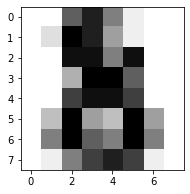

In [75]:
from sklearn import datasets

import matplotlib.pyplot as plt

# Load the digits dataset
digits = datasets.load_digits()

# Display the last digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

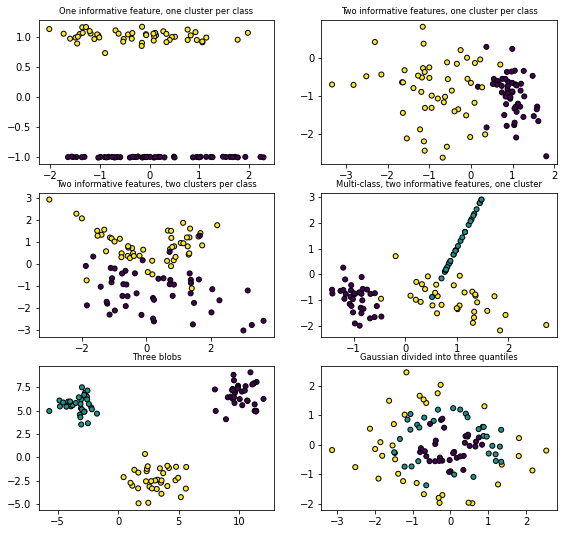

In [76]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)

plt.subplot(321)
plt.title("One informative feature, one cluster per class", fontsize="small")
X1, Y1 = make_classification(
    n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1
)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

plt.subplot(322)
plt.title("Two informative features, one cluster per class", fontsize="small")
X1, Y1 = make_classification(
    n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1
)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

plt.subplot(323)
plt.title("Two informative features, two clusters per class", fontsize="small")
X2, Y2 = make_classification(n_features=2, n_redundant=0, n_informative=2)
plt.scatter(X2[:, 0], X2[:, 1], marker="o", c=Y2, s=25, edgecolor="k")

plt.subplot(324)
plt.title("Multi-class, two informative features, one cluster", fontsize="small")
X1, Y1 = make_classification(
    n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=3
)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

plt.subplot(325)
plt.title("Three blobs", fontsize="small")
X1, Y1 = make_blobs(n_features=2, centers=3)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

plt.subplot(326)
plt.title("Gaussian divided into three quantiles", fontsize="small")
X1, Y1 = make_gaussian_quantiles(n_features=2, n_classes=3)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

plt.show()

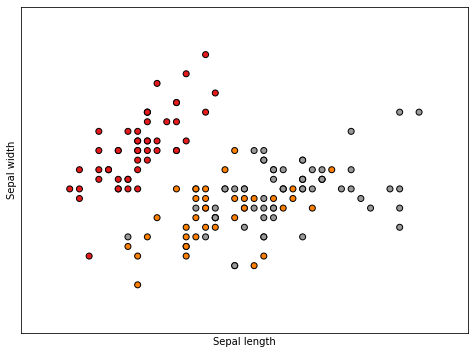

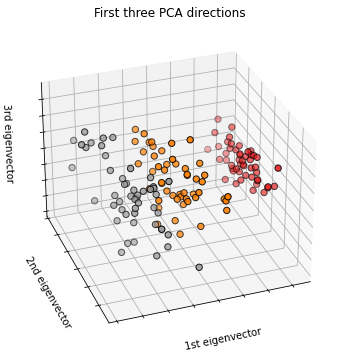

In [77]:
import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

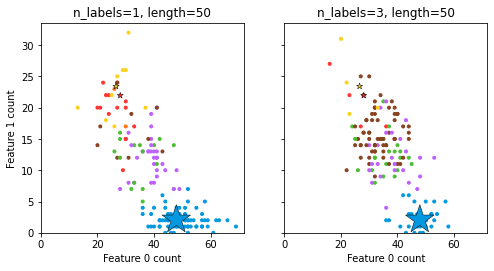

The data was generated from (random_state=977):
Class	P(C)	P(w0|C)	P(w1|C)
red	0.11	0.56	0.44
blue	0.77	0.96	0.04
yellow	0.12	0.53	0.47


In [79]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_multilabel_classification as make_ml_clf

COLORS = np.array(
    [
        "!",
        "#FF3333",  # red
        "#0198E1",  # blue
        "#BF5FFF",  # purple
        "#FCD116",  # yellow
        "#FF7216",  # orange
        "#4DBD33",  # green
        "#87421F",  # brown
    ]
)

RANDOM_SEED = np.random.randint(2**10)


def plot_2d(ax, n_labels=1, n_classes=3, length=50):
    X, Y, p_c, p_w_c = make_ml_clf(
        n_samples=150,
        n_features=2,
        n_classes=n_classes,
        n_labels=n_labels,
        length=length,
        allow_unlabeled=False,
        return_distributions=True,
        random_state=RANDOM_SEED,
    )

    ax.scatter(
        X[:, 0], X[:, 1], color=COLORS.take((Y * [1, 2, 4]).sum(axis=1)), marker="."
    )
    ax.scatter(
        p_w_c[0] * length,
        p_w_c[1] * length,
        marker="*",
        linewidth=0.5,
        edgecolor="black",
        s=20 + 1500 * p_c**2,
        color=COLORS.take([1, 2, 4]),
    )
    ax.set_xlabel("Feature 0 count")
    return p_c, p_w_c


_, (ax1, ax2) = plt.subplots(1, 2, sharex="row", sharey="row", figsize=(8, 4))
plt.subplots_adjust(bottom=0.15)

p_c, p_w_c = plot_2d(ax1, n_labels=1)
ax1.set_title("n_labels=1, length=50")
ax1.set_ylabel("Feature 1 count")

plot_2d(ax2, n_labels=3)
ax2.set_title("n_labels=3, length=50")
ax2.set_xlim(left=0, auto=True)
ax2.set_ylim(bottom=0, auto=True)

plt.show()

print("The data was generated from (random_state=%d):" % RANDOM_SEED)
print("Class", "P(C)", "P(w0|C)", "P(w1|C)", sep="\t")
for k, p, p_w in zip(["red", "blue", "yellow"], p_c, p_w_c.T):
    print("%s\t%0.2f\t%0.2f\t%0.2f" % (k, p, p_w[0], p_w[1]))